# Titanic Data Analysis 
## Badrinath Thirumalachari
### The main question we are trying to answer is, what factors made people more likely to survive?
#### Lets start by looking at the data set.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic_data.csv")

#lets take a peek into the data set
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Lets get some stats from the dataset

In [31]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To answer the question lets start by investigating the dataset. The best way to do that is to make some plots.

If we look at the dataset we see that we can still divide the group into Males and Females and see if sex was a factor in the survival.

('Total Number of females: ', 314)
('Total Number of females survived: ', 233)
('Total Number of females didnt survive: ', 81)
('Total Number of males: ', 577)
('Total Number of males survived: ', 109)
('Total Number of males didnt survive: ', 468)


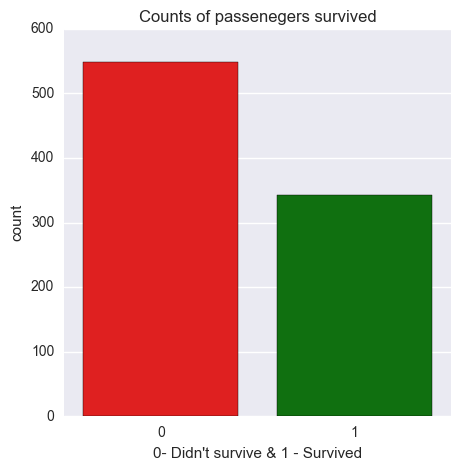

In [32]:
df = pd.pivot_table(data=titanic_df, index='Sex', values='PassengerId', columns='Survived', aggfunc='count')

print("Total Number of females: ", df.loc['female'][0] + df.loc['female'][1])
print("Total Number of females survived: ", df.loc['female'][1] )
print("Total Number of females didnt survive: ", df.loc['female'][0] )
print("Total Number of males: ", df.loc['male'][0] + df.loc['male'][1])
print("Total Number of males survived: ", df.loc['male'][1] )
print("Total Number of males didnt survive: ", df.loc['male'][0])
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=titanic_df,palette=['r','g'])
plt.title("Counts of passenegers survived")
plt.xlabel("0- Didn't survive & 1 - Survived")

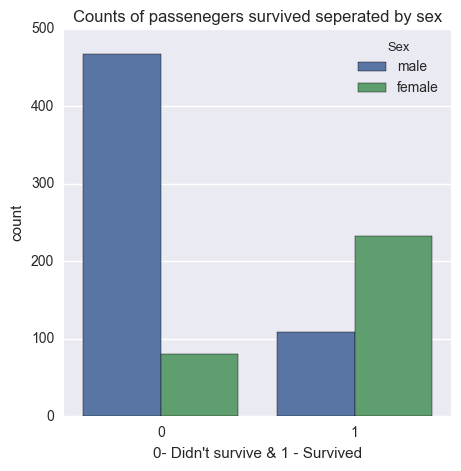

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',hue='Sex',data=titanic_df)
plt.title("Counts of passenegers survived seperated by sex")
plt.xlabel("0- Didn't survive & 1 - Survived")

I like to see the data in a pie chart as it will give me a better perspective. From the pie chart we can see that 74.2% of the female passengers survived and only 18.9% of the male passengers survived. We can plot the survival probability to be sure.

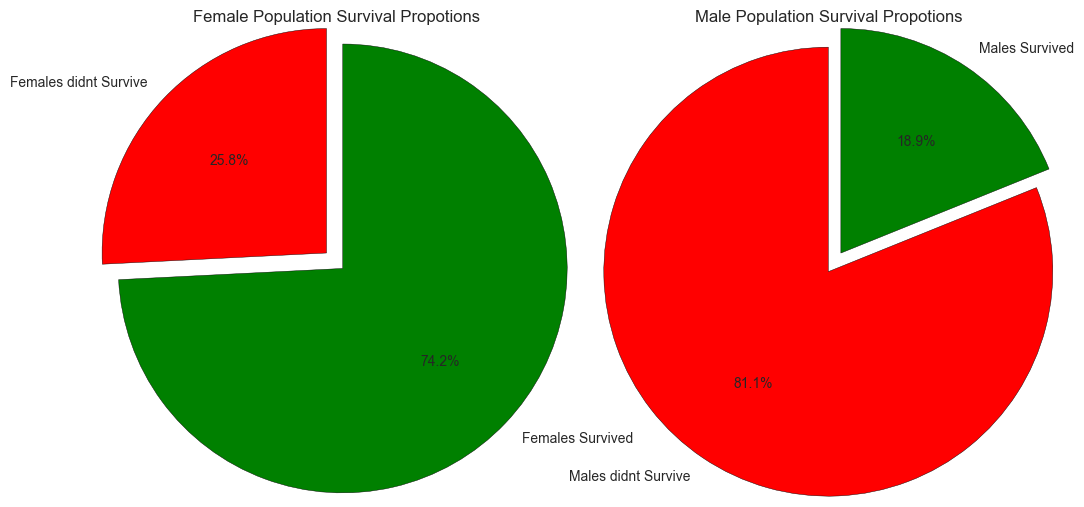

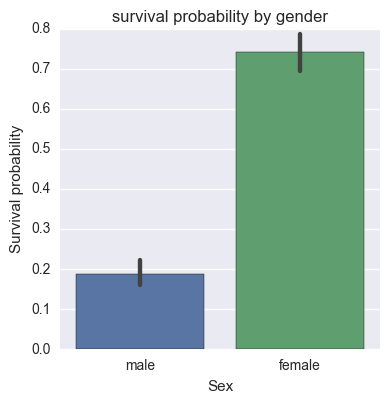

In [34]:
#plots 
fig = plt.figure(figsize=(10,10))
colors = ["r","g"]

ax1 = fig.add_subplot(221)
ax1.pie(df.loc['female'],labels=['Females didnt Survive','Females Survived'],shadow=False,colors=colors,explode=(0, 0.10),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
ax1.set_title("Female Population Survival Propotions")
plt.tight_layout()

ax2 = fig.add_subplot(222)
ax2.pie(df.loc['male'],labels=['Males didnt Survive','Males Survived'],shadow=False,colors=colors,explode=(0, 0.10),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
ax2.set_title("Male Population Survival Propotions")
plt.tight_layout()

plt.figure()
sns.factorplot(x="Sex", y="Survived", data=titanic_df, kind="bar")
plt.title("survival probability by gender")
plt.ylabel("Survival probability")

Now we have to prove statistically that "Sex" was a factor in deciding if a person survived or not. Looking at the plot we can say that this is the case but we can also perform a hypothesis testing of two population proportions and cosider the people who survived.
Our hypothesis can be as follows:

| Sample size   | Propotions survived   | Sex  |
| ------------- |:-------------:| -----:|
| 314      | 74.5% | Female |
| 577      | 18.9% |   Male |

Let p<sub>1</sub> = Propotions of females survived

Let p<sub>2</sub> = Propotions of males survived

H<sub>0</sub>: p<sub>1</sub> - p<sub>2</sub> = 0 : No difference in the propotions : Null Hypothesis: Passenger's sex did not play a role in determining the survivability.

H<sub>A</sub>: p<sub>1</sub> - p<sub>2</sub> != 0 : Significant difference in the propotions : Alternate Hypothesis : Passenger's sex played an important role in determining the survivability.

Lets perform a two tailed test with a significance level of **.05**. I am using this [link](http://www.kean.edu/~fosborne/bstat/07d2pop.html) as reference to perform my calculations. 

The pooled estimate value (p) = .383

z-statistic value = +-16.3

For a two tailed test with an alpha value of **.05** with **.025** in each tail, the z<sub>critical</sub> value is **+-1.96**. Our z-statistic value is **+-16.3** which is greater then the z<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's sex was responsible in determining if a passenger survived.

Lets look at the r-squared value of this t-statistic.

r-squared = .23

we can also say 23% of the difference in propotions can be explained by gender. Their is still another 77% that needs investigation.

Lets now investigate if the passenger's class was a variable that determined the survivability. It will be easy to perform a chi-square test on the grouped population and determine if the effect was random or not.

In [35]:
titanic_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [36]:
survived_df_1 = titanic_df[titanic_df['Survived'] == 1]
survived_df_1.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,136,136,136,136,122,136,136,136,136,117,134
2,87,87,87,87,83,87,87,87,87,13,87
3,119,119,119,119,85,119,119,119,119,6,119


In [37]:
didnt_survive_df = titanic_df[titanic_df['Survived'] == 0]
didnt_survive_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,80,80,80,80,64,80,80,80,80,59,80
2,97,97,97,97,90,97,97,97,97,3,97
3,372,372,372,372,270,372,372,372,372,6,372


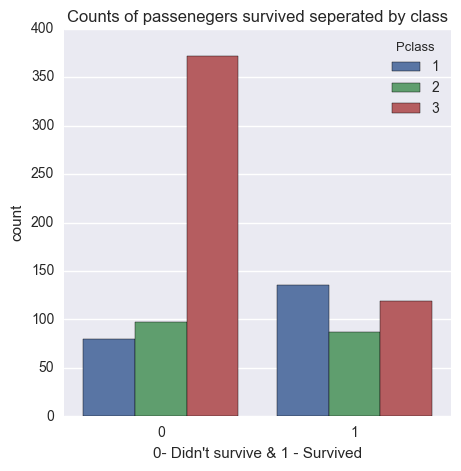

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',hue='Pclass',data=titanic_df)
plt.title("Counts of passenegers survived seperated by class")
plt.xlabel("0- Didn't survive & 1 - Survived")

In [39]:
print("Total Number of passengers in first class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[0] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[0])
print("Total Number of passengers in first class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[0] )
print("Total Number of passengers in second class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[1] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[1])
print("Total Number of passengers in second class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[1] )
print("Total Number of passengers in second class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[2] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[2])
print("Total Number of passengers in second class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[2] )

('Total Number of passengers in first class : ', 216)
('Total Number of passengers in first class survived: ', 136)
('Total Number of passengers in second class : ', 184)
('Total Number of passengers in second class survived: ', 87)
('Total Number of passengers in second class : ', 491)
('Total Number of passengers in second class survived: ', 119)


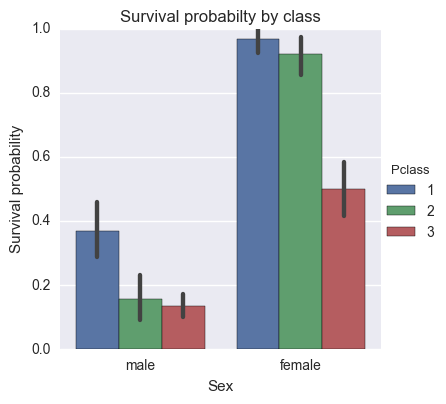

In [40]:
plt.figure()
sns.factorplot(x="Sex", y="Survived", hue="Pclass",data=titanic_df, kind="bar")
plt.title("Survival probabilty by class")
plt.ylabel("Survival probability")

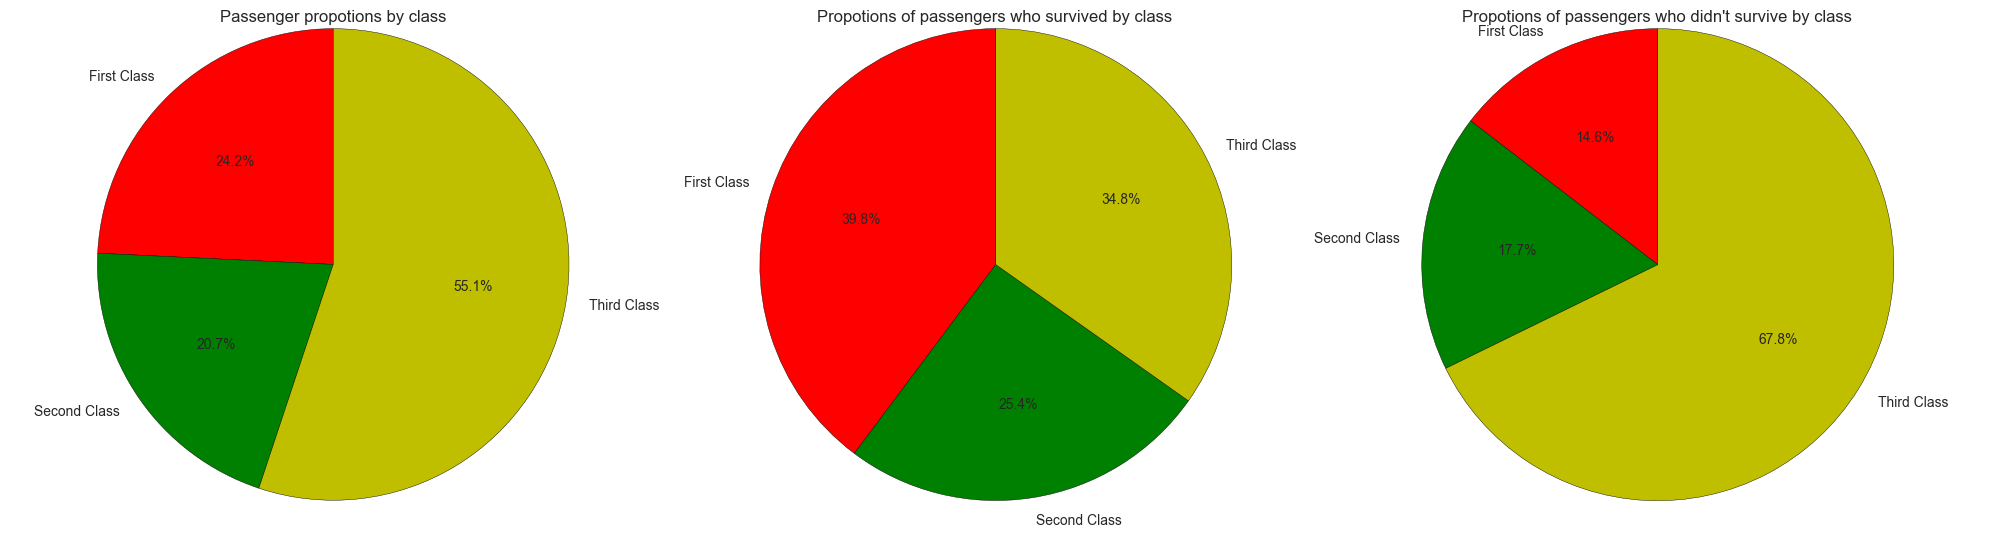

In [41]:
fig = plt.figure(figsize=(20,15))
colors = ["r","g", "y"]

ax1 = fig.add_subplot(331)
ax1.pie(titanic_df.groupby("Pclass").count()["Survived"],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax1.set_title("Passenger propotions by class")
plt.axis('equal')
plt.tight_layout()

ax2 = fig.add_subplot(332)
ax2.pie(survived_df_1.groupby("Pclass").count()["Survived"],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax2.set_title("Propotions of passengers who survived by class")
plt.axis('equal')
plt.tight_layout()

ax3 = fig.add_subplot(333)
ax3.pie(didnt_survive_df.groupby("Pclass").count()['Survived'],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax3.set_title(("Propotions of passengers who didn't survive by class"))
plt.axis('equal')
plt.tight_layout()

Looking at the pie charts above it does look like of the passengers majority belonged to third class of which 67.8% didn't survive and only 24.2% belonged to first class of which 14.6% didn't survive. Just to be sure we can perform a chi-squared test for these three propotions and decide if these events were independent or not random.
I have perfomed the chi-squared test in the excel sheet at this [link](https://github.com/lordbadri/Udacity_Data_Analyst_Nanodegree/blob/master/Project_2_titanic_data/chisqtest.xlsx). After performing the test we see that the significance level is less then **.001**. Hence we can say that these events were not random and class did determine if a passenger survived or not.

Lets now invesigate the age of the passengers and its role in the survivability of a passenger.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

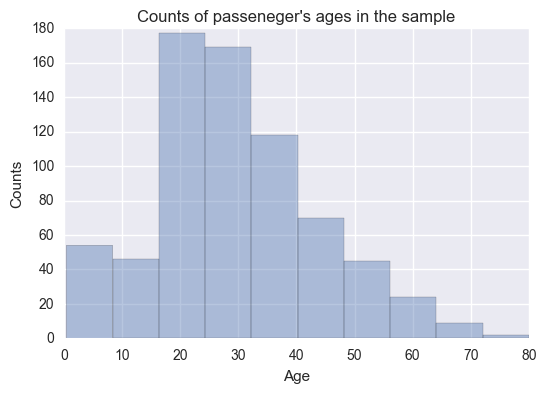

In [42]:
plt.figure()
sns.distplot(titanic_df['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages in the sample")
plt.ylabel("Counts")
titanic_df['Age'].dropna().describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

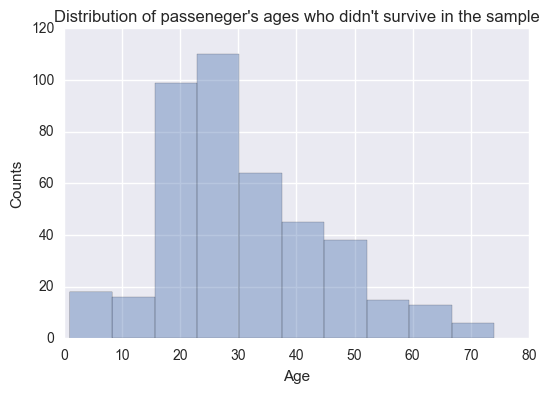

In [43]:
plt.figure()
sns.distplot(didnt_survive_df['Age'].dropna(),kde=False,bins=10)
plt.title("Distribution of passeneger's ages who didn't survive in the sample")
plt.ylabel("Counts")
didnt_survive_df['Age'].dropna().describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

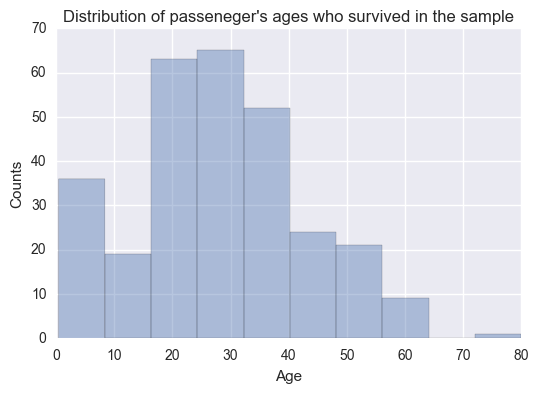

In [44]:
plt.figure()
sns.distplot(survived_df_1['Age'].dropna(),kde=False,bins=10)
plt.title("Distribution of passeneger's ages who survived in the sample")
plt.ylabel("Counts")
survived_df_1['Age'].dropna().describe() 

From the plots above we can see that we have two kinds of distributions. The age of the passengers who survived and the passengers who didn't.

Our hypothesis can be as follows:

Let mu<sub>1</sub> = Mean age of the population that survived.

Let mu<sub>2</sub> = Mean age of the population that didn't survive.

H<sub>0</sub>: mu<sub>1</sub> - mu<sub>2</sub> = 0 : No difference in the mean ages of the population : Null Hypothesis: Passenger's age did not play a role in determining the survivability.

H<sub>A</sub>: mu<sub>1</sub> - mu<sub>2</sub> != 0 : Significant difference in the mean ages of the population : Alternate Hypothesis : Passenger's age played an important role in determining the survivability.

Lets perform a two tailed t-test with a significance level of **.05**. I am choosing a t-test over a z-test because we do not know anything about the population mean from which the sample was selected from and we cannot assume that the sample was selected from a population that is normally distributed.

From the sample we have the following information:

Let the X<sub>s</sub> and S<sub>s</sub> be the sample mean and standard deviation of the passengers ages that survived.

Let the X<sub>ds</sub> and S<sub>ds</sub> be the sample mean and standard deviation of the passengers ages that did not survived.


| Sample size   | Mean and Std of sample   | Type of passenger  |
| ------------- |:-------------:| -----:|
| 424      | 30.62 & 14.17 | Didn't survive |
| 290      | 28.34 & 14.95| Survived    |

From the above information we can calculate the standard error and t-statistic value.

Standard error S<sub>E</sub> = 1.115

t-statistic = +-2.046

I want to be sure so I will again perform a two tailed test with an alpha value of **.05** with **.025** in each tail, the t<sub>critical</sub> value is **+-1.96**. Our t-statistic value is **+-2.046** which is greater then the t<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's age was responsible in determining if a passenger survived. 
This result is very close to the t<sub>critical</sub> vlaue and I am not convinced. This might be due to the fact that off the 891 sample given to us 177 sample points have no value for the age.

Lets look at the r-squared value to see if its really the case.

r-squared = .0058

The r-squared value in close to zero hence I can decide that age didn't play a mojor role in the survivability of the passenger.

We can doulble check our calculation using this [link](http://www.quantitativeskills.com/sisa/statistics/t-test.htm) and looks like the calculations are on point. The p value is greater then alpha, hence we accept the null hypothesis.



We can do a similar analysis and determine if the "Fare" was a factor in determining the survivability of a passenger, I want to check if people who paid more survived.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

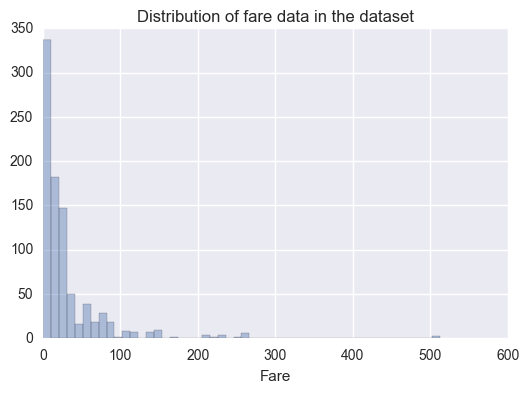

In [45]:
plt.figure()
sns.distplot(titanic_df['Fare'].dropna(),kde=False,bins=50)
plt.title("Distribution of fare data in the dataset")
titanic_df['Fare'].dropna().describe() 

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

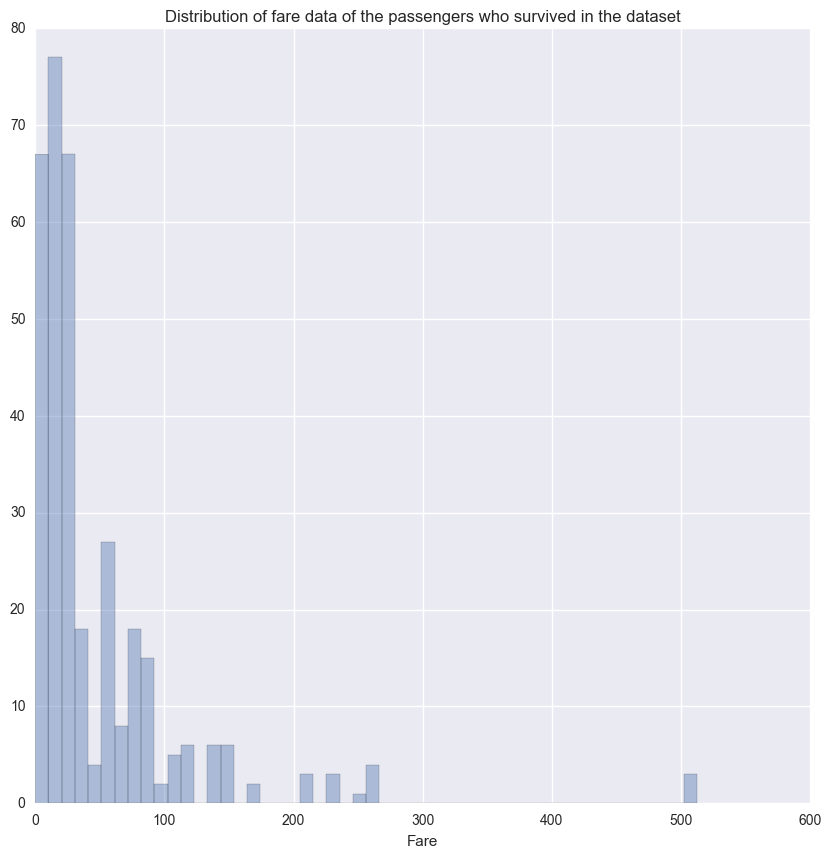

In [46]:
plt.figure(figsize=(10,10))
sns.distplot(survived_df_1['Fare'].dropna(),kde=False,bins=50)
plt.title("Distribution of fare data of the passengers who survived in the dataset")
survived_df_1['Fare'].dropna().describe() 

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

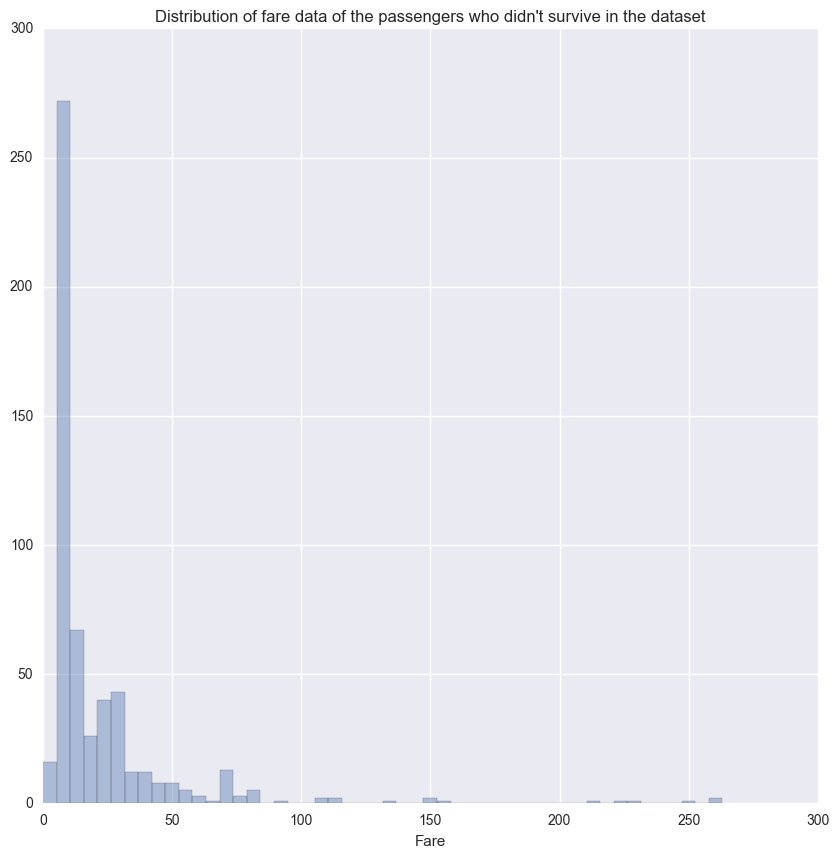

In [47]:
plt.figure(figsize=(10,10))
sns.distplot(didnt_survive_df['Fare'].dropna(),kde=False,bins=50)
plt.title("Distribution of fare data of the passengers who didn't survive in the dataset")
didnt_survive_df['Fare'].dropna().describe()

From the plots above we can see that we have two positively skewed distributions. The fare distribution of the passengers who survived and the passengers who didn't.

Our hypothesis can be as follows:

Let mu<sub>1</sub> = Mean fare of the population that survived.

Let mu<sub>2</sub> = Mean fare of the population that didn't survive.

H<sub>0</sub>: mu<sub>1</sub> - mu<sub>2</sub> = 0 : No difference in the mean fare of the population : Null Hypothesis: Passenger's fare did not play a role in determining the survivability.

H<sub>A</sub>: mu<sub>1</sub> - mu<sub>2</sub> != 0 : Significant difference in the mean fare of the population : Alternate Hypothesis : Passenger's fare played an important role in determining the survivability.

Lets perform a two tailed t-test with a significance level of **.05**. I am choosing a t-test over a z-test because we do not know anything about the population mean from which the sample was selected from and we cannot assume that the sample was selected from a population that is normally distributed.

From the sample we have the following information:

Let the X<sub>s</sub> and S<sub>s</sub> be the sample mean and standard deviation of the passengers fares that survived.

Let the X<sub>ds</sub> and S<sub>ds</sub> be the sample mean and standard deviation of the passengers fares that did not survived.


| Sample size   | Mean and Std of sample   | Type of passenger  |
| ------------- |:-------------:| -----:|
| 549      | 22.12 & 31.39 | Didn't survive |
| 342      | 48.4 & 66.6| Survived    |

From the above information we can calculate the standard error and t-statistic value.

Standard error S<sub>E</sub> = 3.842

t-statistic = +-6.84

For a two tailed test with an alpha value of **.05** with **.025** in each tail, the t<sub>critical</sub> value is **+-1.96**. Our t-statistic value is **+-6.84** which is greater then the t<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's fare was not responsible in determining if a passenger survived.

This looks correct because the first class passengers who generally payed more for the fare had higher chances of survival, It can also be shown by doing a t-statistic test on the fare data like shown above.

We can doulble check our calculation using this [link](http://www.quantitativeskills.com/sisa/statistics/t-test.htm) and looks like the calculations are correct.

Lets look at the r-squared value to see if its really the case.

r-squared = .05

we can say 5% of the difference in mean fares can be explained by the survivability. Their is still another 95% that needs investigation.

Lets just look at more information from the dataset. We can look at the passengers ages by class see if the passengers in first class were older.

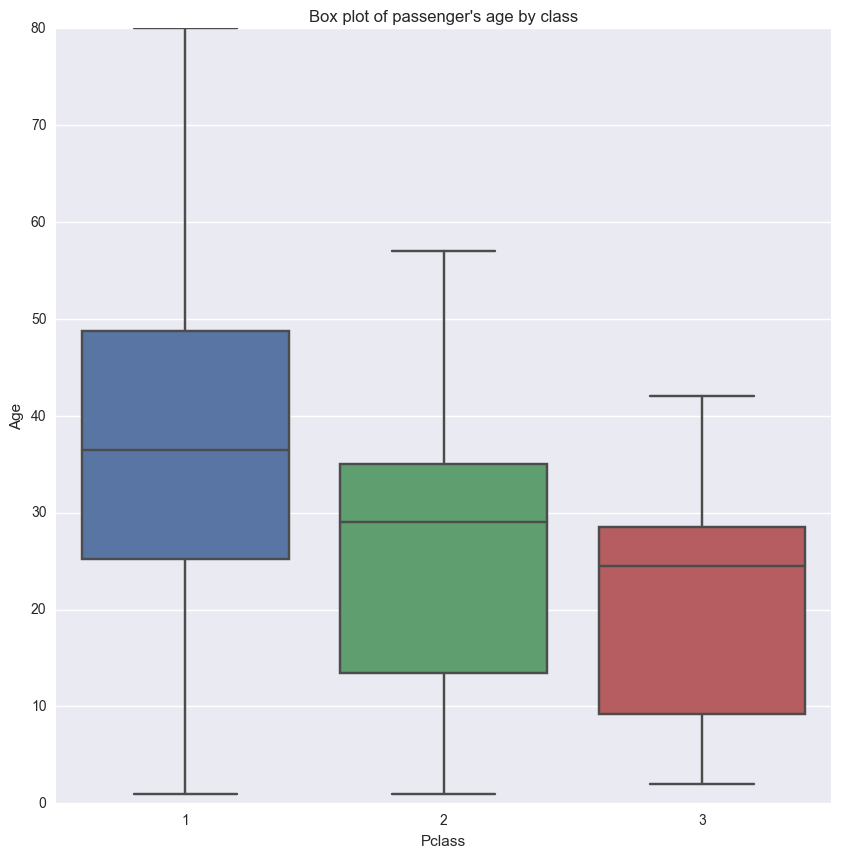

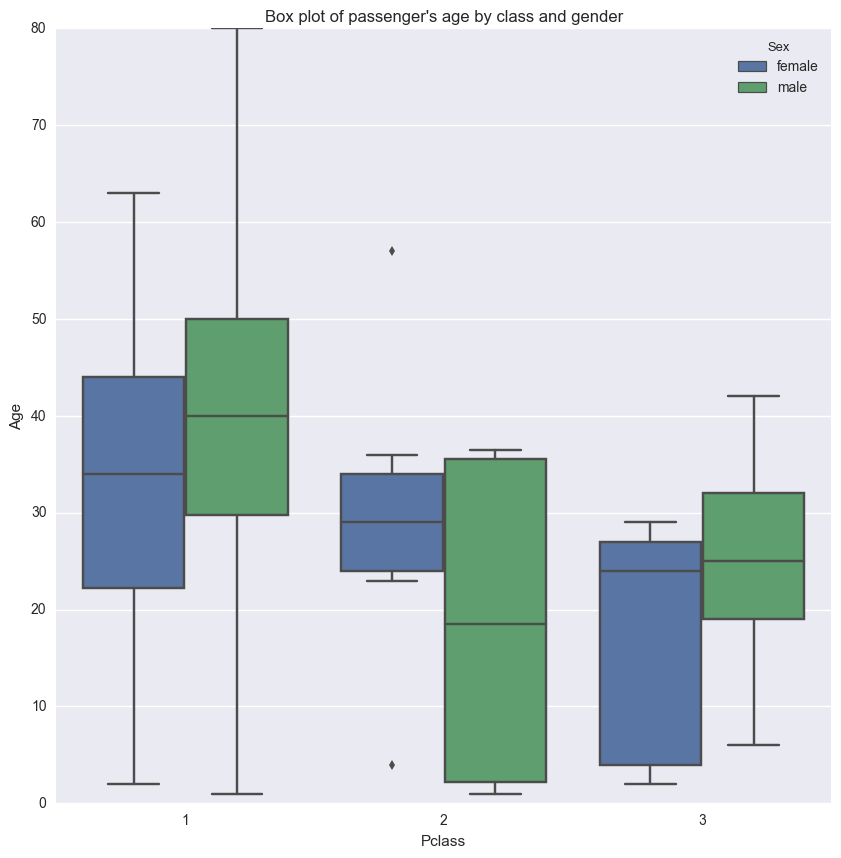

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=titanic_df.dropna())
plt.title("Box plot of passenger's age by class")
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=titanic_df.dropna())
plt.title("Box plot of passenger's age by class and gender")

It looks like passengers were older in first class and the male passengers that belong to first class have the highest mean age.

# Conculsions

1. The gender of the passenger palyed a really important role in deciding if the passenger survived. From watching the movie and doing some research online the protocol for evacuation was children and females first. The propotions z-test was clearly conculsive that sex of the passenger palyed a major role in determining the survivability. While this does not mean gender was the cause, it was just one of the factors and their is statistical evidence that gender mattered when it came to the survival of a passenger. Correlation does not mean causation.

2. The first class pasengers had a higher chance of survival compared to the passengers in third class, well this makes sense because the first class passengers stay above deck and are given priority during rescue. It can clearly be seen that the survivabilty is dependent on the class of the passenger and not independent from it from the chi-square test. Their is statistical evidence pointing to correlation between survival and class but its not really the main cause. Many factors payed a significant role in deciding if a passenger survived.

3. Their was no statistical evidence that age of the passenger was a factor in determining the survivability of the passenger. The r-squared value of the t-statistic was close to zero and we can conculde that the age wasn't a factor but our dataset was not complete and many of the age columns were NaNs. The mean of age column of the sample might not resemble the mean age of the population. 

4. The fare the passenger paid for the ticket did play a role on the survivability because their is some statistical evidence poiting towards it. The r-squared value didn't convince me that their was causation, but just a small correlation. Thinking more about it, first class passengers have higher survial rate and the fare is higher for the first class ticket on the ship.

# Limitations of the above conclusions

1. The dataset provided to us for the anlaysis was limited with a sample size of 891. It had only 7 useful features that I can think of that decided if a passenger survived. The titanic contained 2224 passengers and crew of which 1502 passengers didn't survive.

2. In the dataset itself, many of the data points were NaN and we had to drop them for our statistical analysis. Here of the 891 samples 177 were NaNs and by dropping them we reduced our sample size down even further. The smaller the sample the poorer it is at representing the population.

3. I think if we were provided with more number of samples with more features like if the passenger who survived was a crew member or not, also the division amongst the crew. The crew that worked in the engine room, most of them didn't survive as they were the first to be flooded but the crew that worked above deck and was resposible was passenger escorting survived. Addition of these features might have helped us conclude better.

4. The data collected here I think are from ship manifests that are over a hundred years old and might be faulty.

# Future explorations

1. We can fill out the NaN columns in the age column of the dataset with some meaningful numbers. For eg: we can fill out the missing age values by computing the mean of the passengers seperated by class and gender.

2. We can train a logistic classifier and see the impact of each feature in the model prediction, by checking the test accuracy change with each feature.

# References

1. [https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf](https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf)

2. [https://www.medcalc.org/calc/comparison_of_proportions.php](https://www.medcalc.org/calc/comparison_of_proportions.php)

3. [http://seaborn.pydata.org/api.html](http://seaborn.pydata.org/api.html)

4. [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

5. [https://onlinecourses.science.psu.edu/stat200/node/61](https://onlinecourses.science.psu.edu/stat200/node/61)

6. [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

7. [http://matplotlib.org/gallery.html](http://matplotlib.org/gallery.html)